##  Problem 1 : Austo Motor Company is a leading car manufacturer specializing in SUV, Sedan, and Hatchback models. In its recent board meeting, concerns were raised by the members on the efficiency of the marketing campaign currently being used. The board decides to rope in an analytics professional to improve the existing campaign.

#### #You as an analyst have been tasked with performing a thorough analysis of the data and coming up with insights to improve the marketing campaign.

In [1]:
#Importing necessary libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#Load the CSV data to notebook
df_austo = pd.read_csv('austo_automobile (2) (1)-1.csv')

In [3]:
#Checking for top 10 data to get basic insights
df_austo.head(10)

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV
5,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,79800,60500.0,140300,57000,SUV
6,53,Female,Salaried,Married,Post Graduate,3,Yes,No,Yes,80900,50800.0,131700,51000,SUV
7,52,Male,Salaried,Married,Graduate,4,No,No,Yes,79100,40400.0,119500,68000,SUV
8,52,Male,Salaried,Married,Post Graduate,4,No,No,No,89400,0.0,89400,61000,SUV
9,52,Male,Salaried,Married,Post Graduate,3,No,No,No,83700,0.0,83700,57000,SUV


### 1.  A. What is the important technical information about the dataset that a database administrator would be interested in? (Hint: Information about the size of the dataset and the nature of the variables)

In [4]:
#Total number of elements present in Data-Frame :
print('Total number of elements present in Data-Frame :',df_austo.size)

Total number of elements present in Data-Frame : 22134


In [5]:
#Basic information about size, type of the variables, nature of the variables :
df_austo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB


#### #Here we have 8 Objects, 5 integers and a float data type.

In [6]:
#Shape of the Data-Frame(Rows and Columns)
print('Total number of rows present in Data-Frame : ',df_austo.shape[0])
print('Total number of columns present in Data-Frame : ',df_austo.shape[1])

Total number of rows present in Data-Frame :  1581
Total number of columns present in Data-Frame :  14


In [7]:
#To check descriptive statistics of the data set :
df_austo.describe()

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price
count,1581.000000,1581.000000,1581.000000,1475.000000,1581.000000,1581.000000
mean,31.922201,2.457938,60392.220114,20225.559322,79625.996205,35597.722960
std,8.425978,0.943483,14674.825044,19573.149277,25545.857768,13633.636545
min,22.000000,0.000000,30000.000000,0.000000,30000.000000,18000.000000
25%,25.000000,2.000000,51900.000000,0.000000,60500.000000,25000.000000
50%,29.000000,2.000000,59500.000000,25600.000000,78000.000000,31000.000000
75%,38.000000,3.000000,71800.000000,38300.000000,95900.000000,47000.000000
max,54.000000,4.000000,99300.000000,80500.000000,171000.000000,70000.000000


### B. Take a critical look at the data and do a preliminary analysis of the variables. Do a quality check of the data so that the variables are consistent. Are there any discrepancies present in the data?

In [8]:
#Checking for null values :
df_austo.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

#### #So from the above analysis we can identify that we have 53 missing values for Gender Column, and 106 missinig values for Partner_salary column.

C:\Users\ARNAB-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


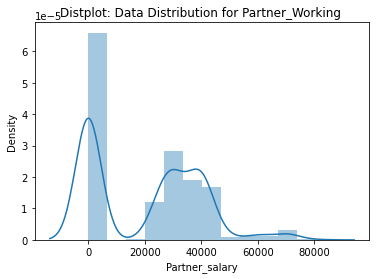

In [9]:
#Testing the skewness for Partner_salary
plt.title('Distplot: Data Distribution for Partner_Working ')
sns.distplot(df_austo.Partner_salary);

In [10]:
#Testing the skewness for Partner_salary
df_austo.Partner_salary.skew()

0.33825489824593036

#### #We can cleary see 'Partner_salary' column is Skewed, so to impute the missing values we can use the 'Median' value.

In [11]:
#To get the median value for 'Partner_salary'
med=df_austo['Partner_salary'].median()
print('Median value for "Partner_salary" :',med)

Median value for "Partner_salary" : 25600.0


In [12]:
#Imputation of null values with median values :
##for value in df_austo['Partner_salary'] == None:
if str(df_austo['Partner_working'])=='No':
    df_austo['Partner_salary'] = 0
    
#df_austo.fillna(df.median())

In [13]:
if str(df_austo['Partner_working'])=='Yes':
    df_austo['Partner_salary'] = df_austo['Partner_salary'].fillna(df_austo['Partner_salary'].median())

In [14]:
#Checking for duplicate values :
print('Total number of duplicate values : ',df_austo.duplicated().sum())

Total number of duplicate values :  0


In [15]:
#Checking the unique values for Age :
print('Unique values for Age :',df_austo.Age.unique())

Unique values for Age : [53 52 50 49 47 46 45 51 54 48 44 43 42 41 40 39 38 37 36 35 34 33 32 31
 30 29 28 27 26 25 24 23 22]


In [16]:
#Checking the unique values for Gender :
print('Unique values for Gender :',df_austo.Gender.unique())

Unique values for Gender : ['Male' 'Femal' 'Female' nan 'Femle']


In [17]:
#Checking the unique values for Profession :
print('Unique values for Profession :',df_austo.Profession.unique())

Unique values for Profession : ['Business' 'Salaried']


In [18]:
#Checking the unique values for Marital Status :
print('Unique values for Marital status :',df_austo.Marital_status.unique())

Unique values for Marital status : ['Married' 'Single']


In [19]:
#Checking the unique values for Education :
print('Unique values for Education :',df_austo.Education.unique())

Unique values for Education : ['Post Graduate' 'Graduate']


In [20]:
#Checking the unique values for No of Dependents :
print('Unique values for No of Dependents :',df_austo.No_of_Dependents.unique())

Unique values for No of Dependents : [4 3 2 1 0]


In [21]:
#Checking the unique values for Personal loan:
print('Unique values for Personal loan :',df_austo.Personal_loan.unique())

Unique values for Personal loan : ['No' 'Yes']


In [22]:
#Checking the unique values for Home loan:
print('Unique values for Home loan :',df_austo.House_loan.unique())

Unique values for Home loan : ['No' 'Yes']


In [23]:
#Checking the unique values for Partner_working:
print('Unique values for Partner_working :',df_austo.Partner_working.unique())

Unique values for Partner_working : ['Yes' 'No']


In [24]:
#Checking the unique values for Salary:
print('Unique values for Salary :',df_austo.Salary.unique())

Unique values for Salary : [99300 95500 97300 72500 79700 79800 80900 79100 89400 83700 81600 81300
 77400 77600 74100 87600 86800 95100 92600 98400 72700 84600 88000 85400
 78000 87900 81900 88500 87700 98300 94900 91100 74500 81700 84700 82200
 79600 77700 72100 96600 72800 73500 90000 87100 90300 72200 78300 90200
 79500 73400 90600 93900 80600 85100 82300 79200 70600 79300 72000 88200
 81000 78400 75400 91000 89700 78800 89800 89900 88700 88900 83300 79000
 77500 76800 71700 89500 77000 86000 86900 85900 79900 74800 98600 76100
 82700 92300 87500 80100 78700 78100 78200 77900 86100 86600 77800 76300
 76200 87200 81200 73300 98900 97700 72600 74200 90700 84000 84800 80200
 70400 71000 84300 53800 85200 85600 80400 77100 76000 71800 64400 73000
 49600 61300 50500 78600 73100 71300 56700 55100 55500 55700 54000 55900
 85300 81500 48600 80000 46900 76500 73600 74600 71600 79400 57300 56500
 54200 60200 83800 82500 50300 77200 76700 73200 70100 69600 68600 65400
 57100 54600 50400 49200

In [25]:
#Checking the unique values for Partner salary:
print('Unique values for Partner salary :',df_austo.Partner_salary.unique())

Unique values for Partner salary : [70700. 70300. 60700. 60200. 60500. 50800. 40400.     0. 70600. 60600.
 60300. 45500. 40200. 40700.   600.   700. 27800. 70000. 40100. 40900.
 27000.    nan 40500. 50400. 80400. 60900. 60100. 70200. 30000. 40300.
 40800. 70800.   900. 45000. 40600. 50700. 80500. 27700. 35800. 26600.
 60000. 27900. 60800. 40000. 70100. 38100. 38200. 30200. 38500. 50900.
 35100. 38700. 38300. 38900. 23200. 24700. 30800. 28100. 38400. 38000.
 23100. 30100. 25700. 70400.   200. 30900. 26100. 45700.   400. 28200.
 70900. 38800. 45200. 26800. 60400. 30300. 25800.   800. 38600. 24500.
 30700. 28500. 24900. 70500. 35900. 30500. 28900. 27200. 45900. 25300.
 35600. 25000. 25200. 26300. 35700. 23800. 32700. 30600. 45600. 28000.
 32600. 28600. 25100. 26700. 24200. 25900. 22100. 25400. 28400. 28300.
 25500. 24000. 32400. 28800. 32300. 32900. 27600. 35500. 23500. 45400.
 28700. 32800. 23700. 32500. 35300. 45800. 27300. 22900. 29800. 30400.
 35400. 24300. 29200. 24600.   100. 50300.

In [26]:
#Checking the unique values for Total salary:
print('Unique values for Total salary :',df_austo.Total_salary.unique())

Unique values for Total salary : [170000 165800 158000 142800 139900 140300 131700 119500  89400  83700
  81600  81300  77400  77600  74100  87600  86800 165700 162900 159000
 133000 130100 128200 126100  78600  88600 109700  88500  87700 169000
 165600 161100 119900 115400 108700  84700  82200  79600  77700  72100
 166900 155200  88200 123600 114000  90000  87100  79700 170400 132900
 128700 121800  90200  79500  73400 171000 154100 143100  81000  85100
  82300  79200 142400 140800 110900 119600 112800  78400  75400 164700
 161800  90600 139500 130300  89900  88700  88900  83300  79000  77500
  76800 153500 131900 129700 117600  86000  86900  85900  79900  74800
 169300 159100 126800  82700  72000 162300 121200  87500  80100  78700
  78100  78200 138200  78000 166500 156900 129400 127000 118100 117200
 116900 112000 104600  87200  81200  80600  73300  71700 158900 157700
 123100  73500 102100  90700  84000  84800  80200  70400 131800 124300
 123900 123300 123800 120800 120000 118000 1

In [27]:
#Checking the unique values for Price :
print('Unique values for Price  :',df_austo.Price.unique())

Unique values for Price  : [61000 57000 51000 68000 67000 63000 62000 50000 66000 52000 60000 64000
 58000 54000 53000 55000 59000 56000 69000 49000 70000 65000 43000 47000
 37000 35000 42000 33000 34000 40000 36000 41000 48000 44000 31000 32000
 39000 45000 46000 38000 30000 25000 22000 28000 29000 23000 21000 20000
 24000 19000 18000 26000 27000]


In [28]:
#Checking the unique values for Car makers :
print('Unique values for Car makers :',df_austo.Make.unique())

Unique values for Car makers : ['SUV' 'Sedan' 'Hatchback']


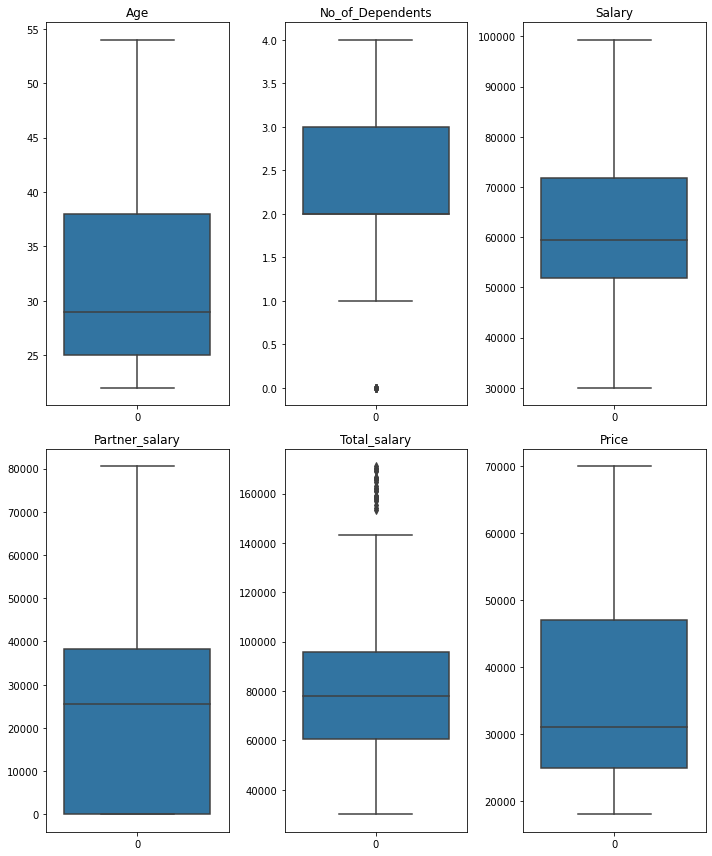

In [29]:
#Checking for outliers :
fig, axes = plt.subplots(2,3,figsize=(10,12))
sns.boxplot(ax=axes[0, 0], data=df_austo.Age).set_title("Age")
sns.boxplot(ax=axes[0, 1], data=df_austo.No_of_Dependents).set_title("No_of_Dependents")
sns.boxplot(ax=axes[0, 2], data=df_austo.Salary).set_title("Salary")
sns.boxplot(ax=axes[1, 0], data=df_austo.Partner_salary).set_title("Partner_salary")
sns.boxplot(ax=axes[1, 1], data=df_austo.Total_salary).set_title("Total_salary")
sns.boxplot(ax=axes[1, 2], data=df_austo.Price).set_title("Price")
plt.tight_layout()

#### ##From the above analysis we can say we have outliers present in our data-set, Total_salary column and No_of_Dependent has outlires present in it. We can consider "No_of_Dependents" with no outliers as 0 value indicates having no dependent, for column "Total_salary" we need not to do outlier treatment as some of them can have a higher salary if their partner is also earning.

### C. Explore all the features of the data separately by using appropriate visualizations and draw insights that can be utilized by the business.

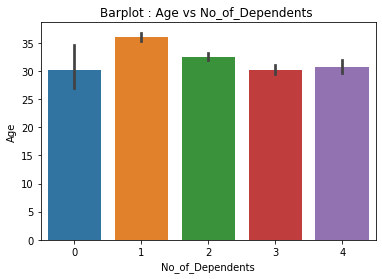

In [30]:
plt.title('Barplot : Age vs No_of_Dependents ')
sns.barplot(data=df_austo, y='Age' , x='No_of_Dependents');

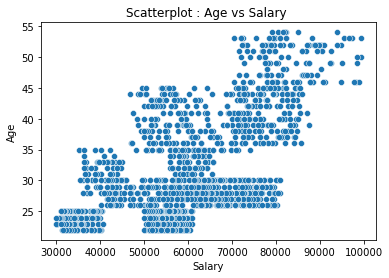

In [31]:
plt.title('Scatterplot : Age vs Salary ')
sns.scatterplot(data=df_austo, y='Age' , x='Salary');

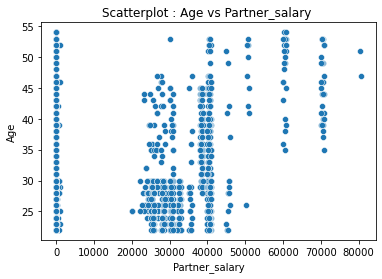

In [32]:
plt.title('Scatterplot : Age vs Partner_salary ')
sns.scatterplot(data=df_austo, y='Age' , x='Partner_salary');

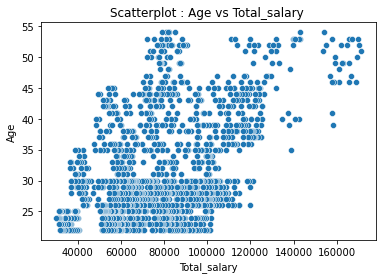

In [33]:
plt.title('Scatterplot : Age vs Total_salary ')
sns.scatterplot(data=df_austo, y='Age' , x='Total_salary');

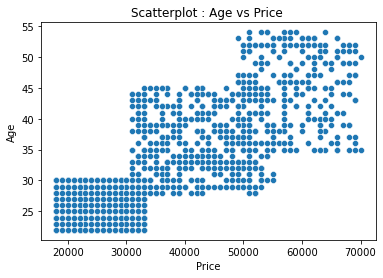

In [34]:
plt.title('Scatterplot : Age vs Price ')
sns.scatterplot(data=df_austo, y='Age' , x='Price');

#### ##	From the analysis we can conclude Age and Price has positive co-relation, Age and Total Salary has some co-relation. Age and salary have a positive co-relation.

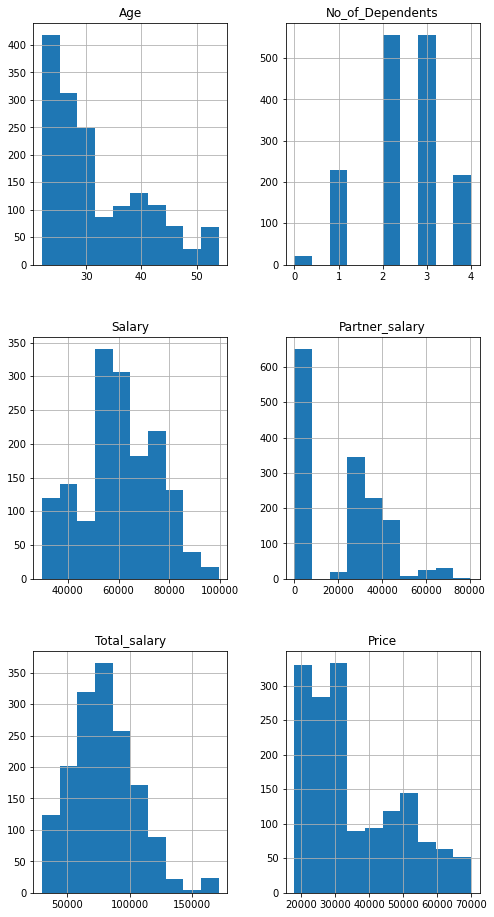

In [35]:
df_austo.hist(figsize=(8,16));

#### ##We can see the skewness also present in the data.

### D. Understanding the relationships among the variables in the dataset is crucial for every analytical project. Perform analysis on the data fields to gain deeper insights. Comment on your understanding of the data.

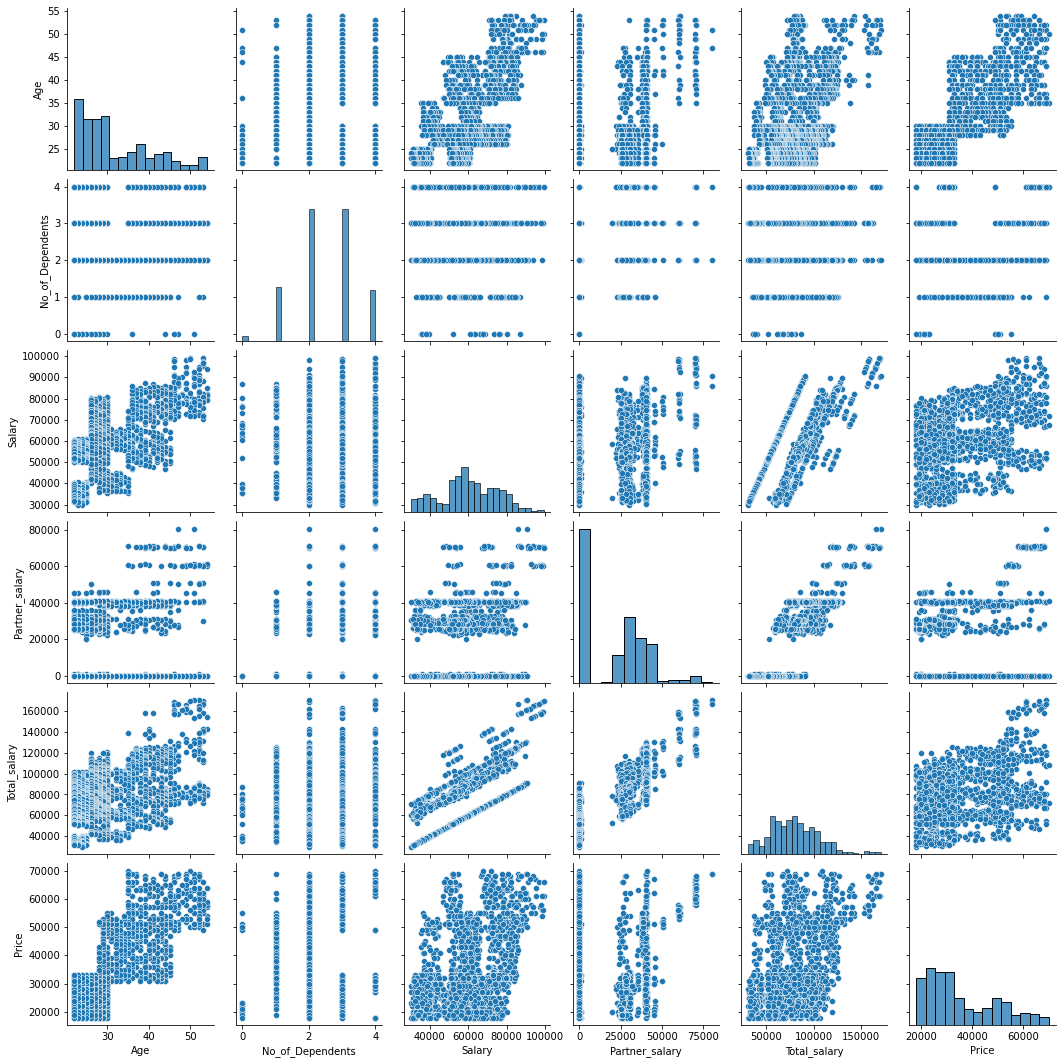

In [36]:
#Pairplot To check the co-relation among variables
sns.pairplot(df_austo)

In [37]:
#check the co-relation among variables
var_corr = df_austo.corr()

<AxesSubplot:>

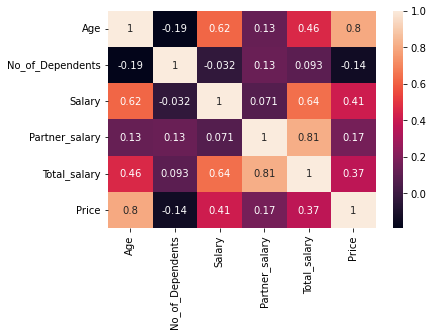

In [38]:
sns.heatmap(var_corr, annot=True)

#### #From the analysis we can conclude that Age and Salary has positive co-relation.
#### ##From the analysis we can conclude that Age and Price has positive co-relation.
#### ###From the analysis we can conclude that Salary and Total_salary has positive co-relation.
#### ####From the analysis we can conclude that Partner_Salary and Total_salary has positive co-relation.

### E. Employees working on the existing marketing campaign have made the following remarks. Based on the data and your analysis state whether you agree or disagree with their observations. Justify your answer Based on the data available.

### E1) Steve Roger says “Men prefer SUV by a large margin, compared to the women”

#### #From the data we can observe that Gender column has some bad values, we need to replace those bad values :

In [39]:
df_austo.Gender.replace('','0', inplace=True)

In [40]:
#Replacing the bad values eith correct values:
df_austo['Gender'].replace('Femal', 'Female', inplace=True)
df_austo['Gender'].replace('Femle', 'Female', inplace=True)

In [41]:
#Counting the total sales for each gender and for each car type :
occur = df_austo.groupby(['Gender', 'Make']).size()
display(occur)

Gender  Make     
Female  Hatchback     15
        SUV          173
        Sedan        141
Male    Hatchback    565
        SUV          118
        Sedan        516
dtype: int64

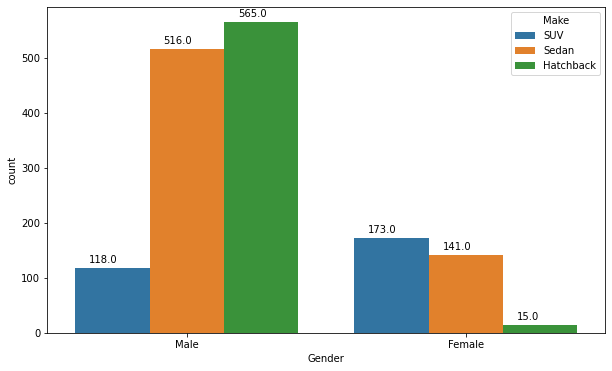

In [42]:
#Boxplot to get visualization :
#plt.title('Countplot: Total purchase count for different car type and gender ')
plt.figure(figsize=(10,6))
plot=sns.countplot(x='Gender', hue='Make', data=df_austo)
for i in plot.patches:
         plot.annotate('{:.1f}'.format(i.get_height()), (i.get_x()+0.05, i.get_height()+10));
    

#### #From the projection we can clearly see Female count for SUV is more than men, so we can strongly disagree with Steve’s statement

### E2) Ned Stark believes that a salaried person is more likely to buy a Sedan.

In [43]:
occur = df_austo.groupby(['Profession', 'Make']).size()
display(occur)

Profession  Make     
Business    Hatchback    290
            SUV           89
            Sedan        306
Salaried    Hatchback    292
            SUV          208
            Sedan        396
dtype: int64

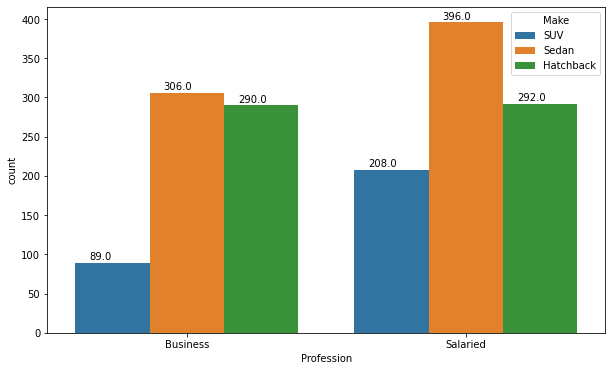

In [44]:
#plt.title('Barplot: Total purchase for each Partner working ')
plt.figure(figsize=(10,6))
plot=sns.countplot(x='Profession', hue='Make', data=df_austo)
for i in plot.patches:
         plot.annotate('{:.1f}'.format(i.get_height()), (i.get_x()+0.05, i.get_height()+4));

#### #From the analysis we can conclude that a salaried person is more likely to buy a Sedan. Ned is correct about his believe

### E3) Sheldon Cooper does not believe any of them; he claims that a salaried male is an easier target for a SUV sale over a Sedan Sale.

In [45]:
occur=df_austo.groupby(['Profession', 'Gender', 'Make']).size()
print(occur)

Profession  Gender  Make     
Business    Female  SUV           55
                    Sedan         50
            Male    Hatchback    289
                    SUV           33
                    Sedan        237
Salaried    Female  Hatchback     15
                    SUV          118
                    Sedan         91
            Male    Hatchback    276
                    SUV           85
                    Sedan        279
dtype: int64


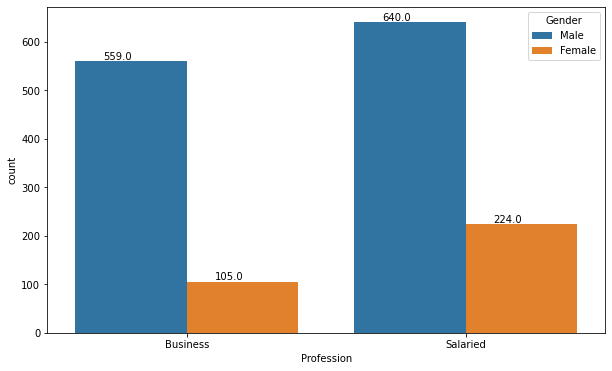

In [46]:
#plt.title('Barplot: Total purchase for each Partner working ')
plt.figure(figsize=(10,6))
plot=sns.countplot(x='Profession', hue='Gender', data=df_austo)
for i in plot.patches:
         plot.annotate('{:.1f}'.format(i.get_height()), (i.get_x()+0.10, i.get_height()+4));

### F. From the given data, comment on the amount spent on purchasing automobiles across the following categories. Comment on how a Business can utilize the results from this exercise. Give justification along with presenting metrics/charts used for arriving at the conclusions.

### Give justification along with presenting metrics/charts used for arriving at the conclusions.

#### F1) Gender

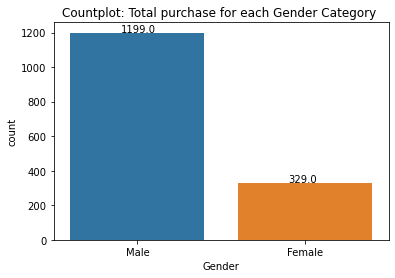

In [47]:
plt.title('Countplot: Total purchase for each Gender Category ')
plot=sns.countplot(x='Gender', data=df_austo)
for i in plot.patches:
         plot.annotate('{:.1f}'.format(i.get_height()), (i.get_x()+0.30, i.get_height()+4));

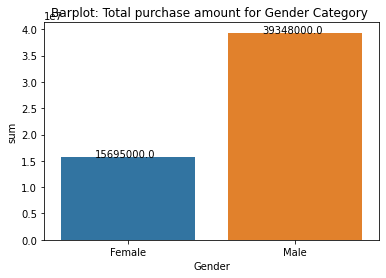

In [48]:
plt.title('Barplot: Total purchase amount for Gender Category ')
df_gen_per = df_austo.groupby('Gender')['Price'].agg(['sum']).reset_index()
plot=sns.barplot(data=df_gen_per, x="Gender", y="sum")
for i in plot.patches:
         plot.annotate('{:.1f}'.format(i.get_height()), (i.get_x()+0.2, i.get_height()+50));

#### #From the above analysis we can say the purchasing capability of Men is higher. 

#### F2) Personal_loan

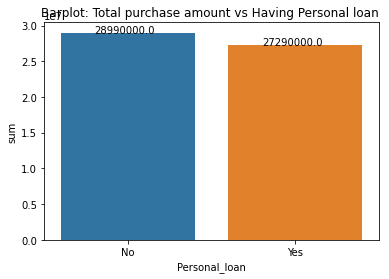

In [49]:
plt.title('Barplot: Total purchase amount vs Having Personal loan ')
df_pl_per = df_austo.groupby('Personal_loan')['Price'].agg(['sum']).reset_index()
plot=sns.barplot(data=df_pl_per, x="Personal_loan", y="sum")
for i in plot.patches:
         plot.annotate('{:.1f}'.format(i.get_height()), (i.get_x()+0.2, i.get_height()+50));

#### #From the above analysis we can conclude that not having a personal loan leads to the higher purchase capability of a auto-mobile cars and having a personal loan leads to lesser purchase capability.

### G. From the current data set comment if having a working partner leads to the purchase of a higher-priced car.

In [50]:
#Groupping by total price for Partner working category
df_wp_per = df_austo.groupby('Partner_working')['Price'].agg(['sum']).reset_index()

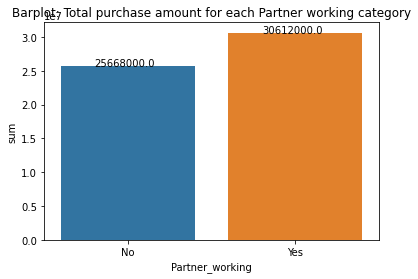

In [51]:
plt.title('Barplot: Total purchase amount for each Partner working category')
plot=sns.barplot(data=df_wp_per, x="Partner_working", y="sum")
for i in plot.patches:
         plot.annotate('{:.1f}'.format(i.get_height()), (i.get_x()+0.2, i.get_height()+50));

#### #From the above analysis we can conclude having a working partner leads to the purchase of a higher-priced car.

### H. The main objective of this analysis is to devise an improved marketing strategy to send targeted information to different groups of potential buyers present in the data. For the current analysis use the Gender and Marital_status - fields to arrive at groups with similar purchase history.

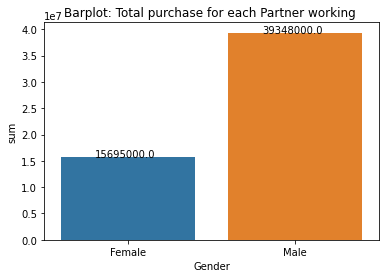

In [52]:
plt.title('Barplot: Total purchase for each Partner working ')
df_gen_per = df_austo.groupby('Gender')['Price'].agg(['sum']).reset_index()
plot=sns.barplot(data=df_gen_per, x="Gender", y="sum")
for i in plot.patches:
         plot.annotate('{:.1f}'.format(i.get_height()), (i.get_x()+0.2, i.get_height()+50));

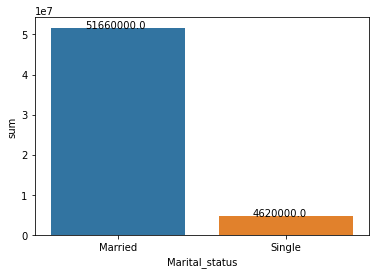

In [53]:
df_gen_mar_stat = df_austo.groupby('Marital_status')['Price'].agg(['sum']).reset_index()
plot=sns.barplot(data=df_gen_mar_stat, x="Marital_status", y="sum")
for i in plot.patches:
         plot.annotate('{:.1f}'.format(i.get_height()), (i.get_x()+0.2, i.get_height()+50));

In [54]:
occur=df_austo.groupby([ 'Gender', 'Marital_status']).size()
print(occur)

Gender  Marital_status
Female  Married            307
        Single              22
Male    Married           1088
        Single             111
dtype: int64


#### #So from the analysis we can say married people buys most cars, for single people they are less interested in cars compeared to married once. The Females who are single are least interested about cars. 

## Problem 2

### A bank can generate revenue in a variety of ways, such as charging interest, transaction fees and financial advice. Interest charged on the capital that the bank lends out to customers has historically been the most significant method of revenue generation. The bank earns profits from the difference between the interest rates it pays on deposits and other sources of funds, and the interest rates it charges on the loans it gives out.

### GODIGT Bank is a mid-sized private bank that deals in all kinds of banking products, such as savings accounts, current accounts, investment products, etc. among other offerings. The bank also cross-sells asset products to its existing customers through personal loans, auto loans, business loans, etc., and to do so they use various communication methods including cold calling, e-mails, recommendations on the net banking, mobile banking, etc.

### GODIGT Bank also has a set of customers who were given credit cards based on risk policy and customer category class but due to huge competition in the credit card market, the bank is observing high attrition in credit card spending. The bank makes money only if customers spend more on credit cards. Given the attrition, the Bank wants to revisit its credit card policy and make sure that the card given to the customer is the right credit card. The bank will make a profit only through the customers that show higher intent towards a recommended credit card. (Higher intent means consumers would want to use the card and hence not be attrite.)

In [55]:
#Load the Excel data to notebook
godigt_df=pd.read_excel('godigt_cc_data-1.xlsx')

In [56]:
godigt_df.head(10).T

,0,1,2,3,4,5,6,7,8,9
userid,1,2,3,4,5,6,7,8,9,10
card_no,4384 39XX XXXX XXXX,4377 48XX XXXX XXXX,4377 48XX XXXX XXXX,4258 06XX XXXX XXXX,4377 48XX XXXX XXXX,5241 78XX XXXX XXXX,4055 33XX XXXX XXXX,4375 51XX XXXX XXXX,4377 48XX XXXX XXXX,4386 28XX XXXX XXXX
card_bin_no,438439,437748,437748,425806,437748,524178,405533,437551,437748,438628
Issuer,Visa,Visa,Visa,Visa,Visa,Mastercard,Visa,Visa,Visa,Visa
card_type,edge,prosperity,rewards,indianoil,edge,cashback,cashback,edge,cashback,shoprite
card_source_date,2019-09-29 00:00:00,2002-10-30 00:00:00,2013-10-05 00:00:00,1999-06-01 00:00:00,2006-06-13 00:00:00,2015-01-28 00:00:00,2013-11-08 00:00:00,2014-12-27 00:00:00,2015-07-15 00:00:00,2000-09-20 00:00:00
high_networth,B,A,C,E,B,E,E,B,D,D
active_30,0,1,0,0,1,0,1,0,0,0
active_60,1,1,0,1,1,0,1,1,0,0
active_90,1,1,0,1,1,1,1,1,1,0


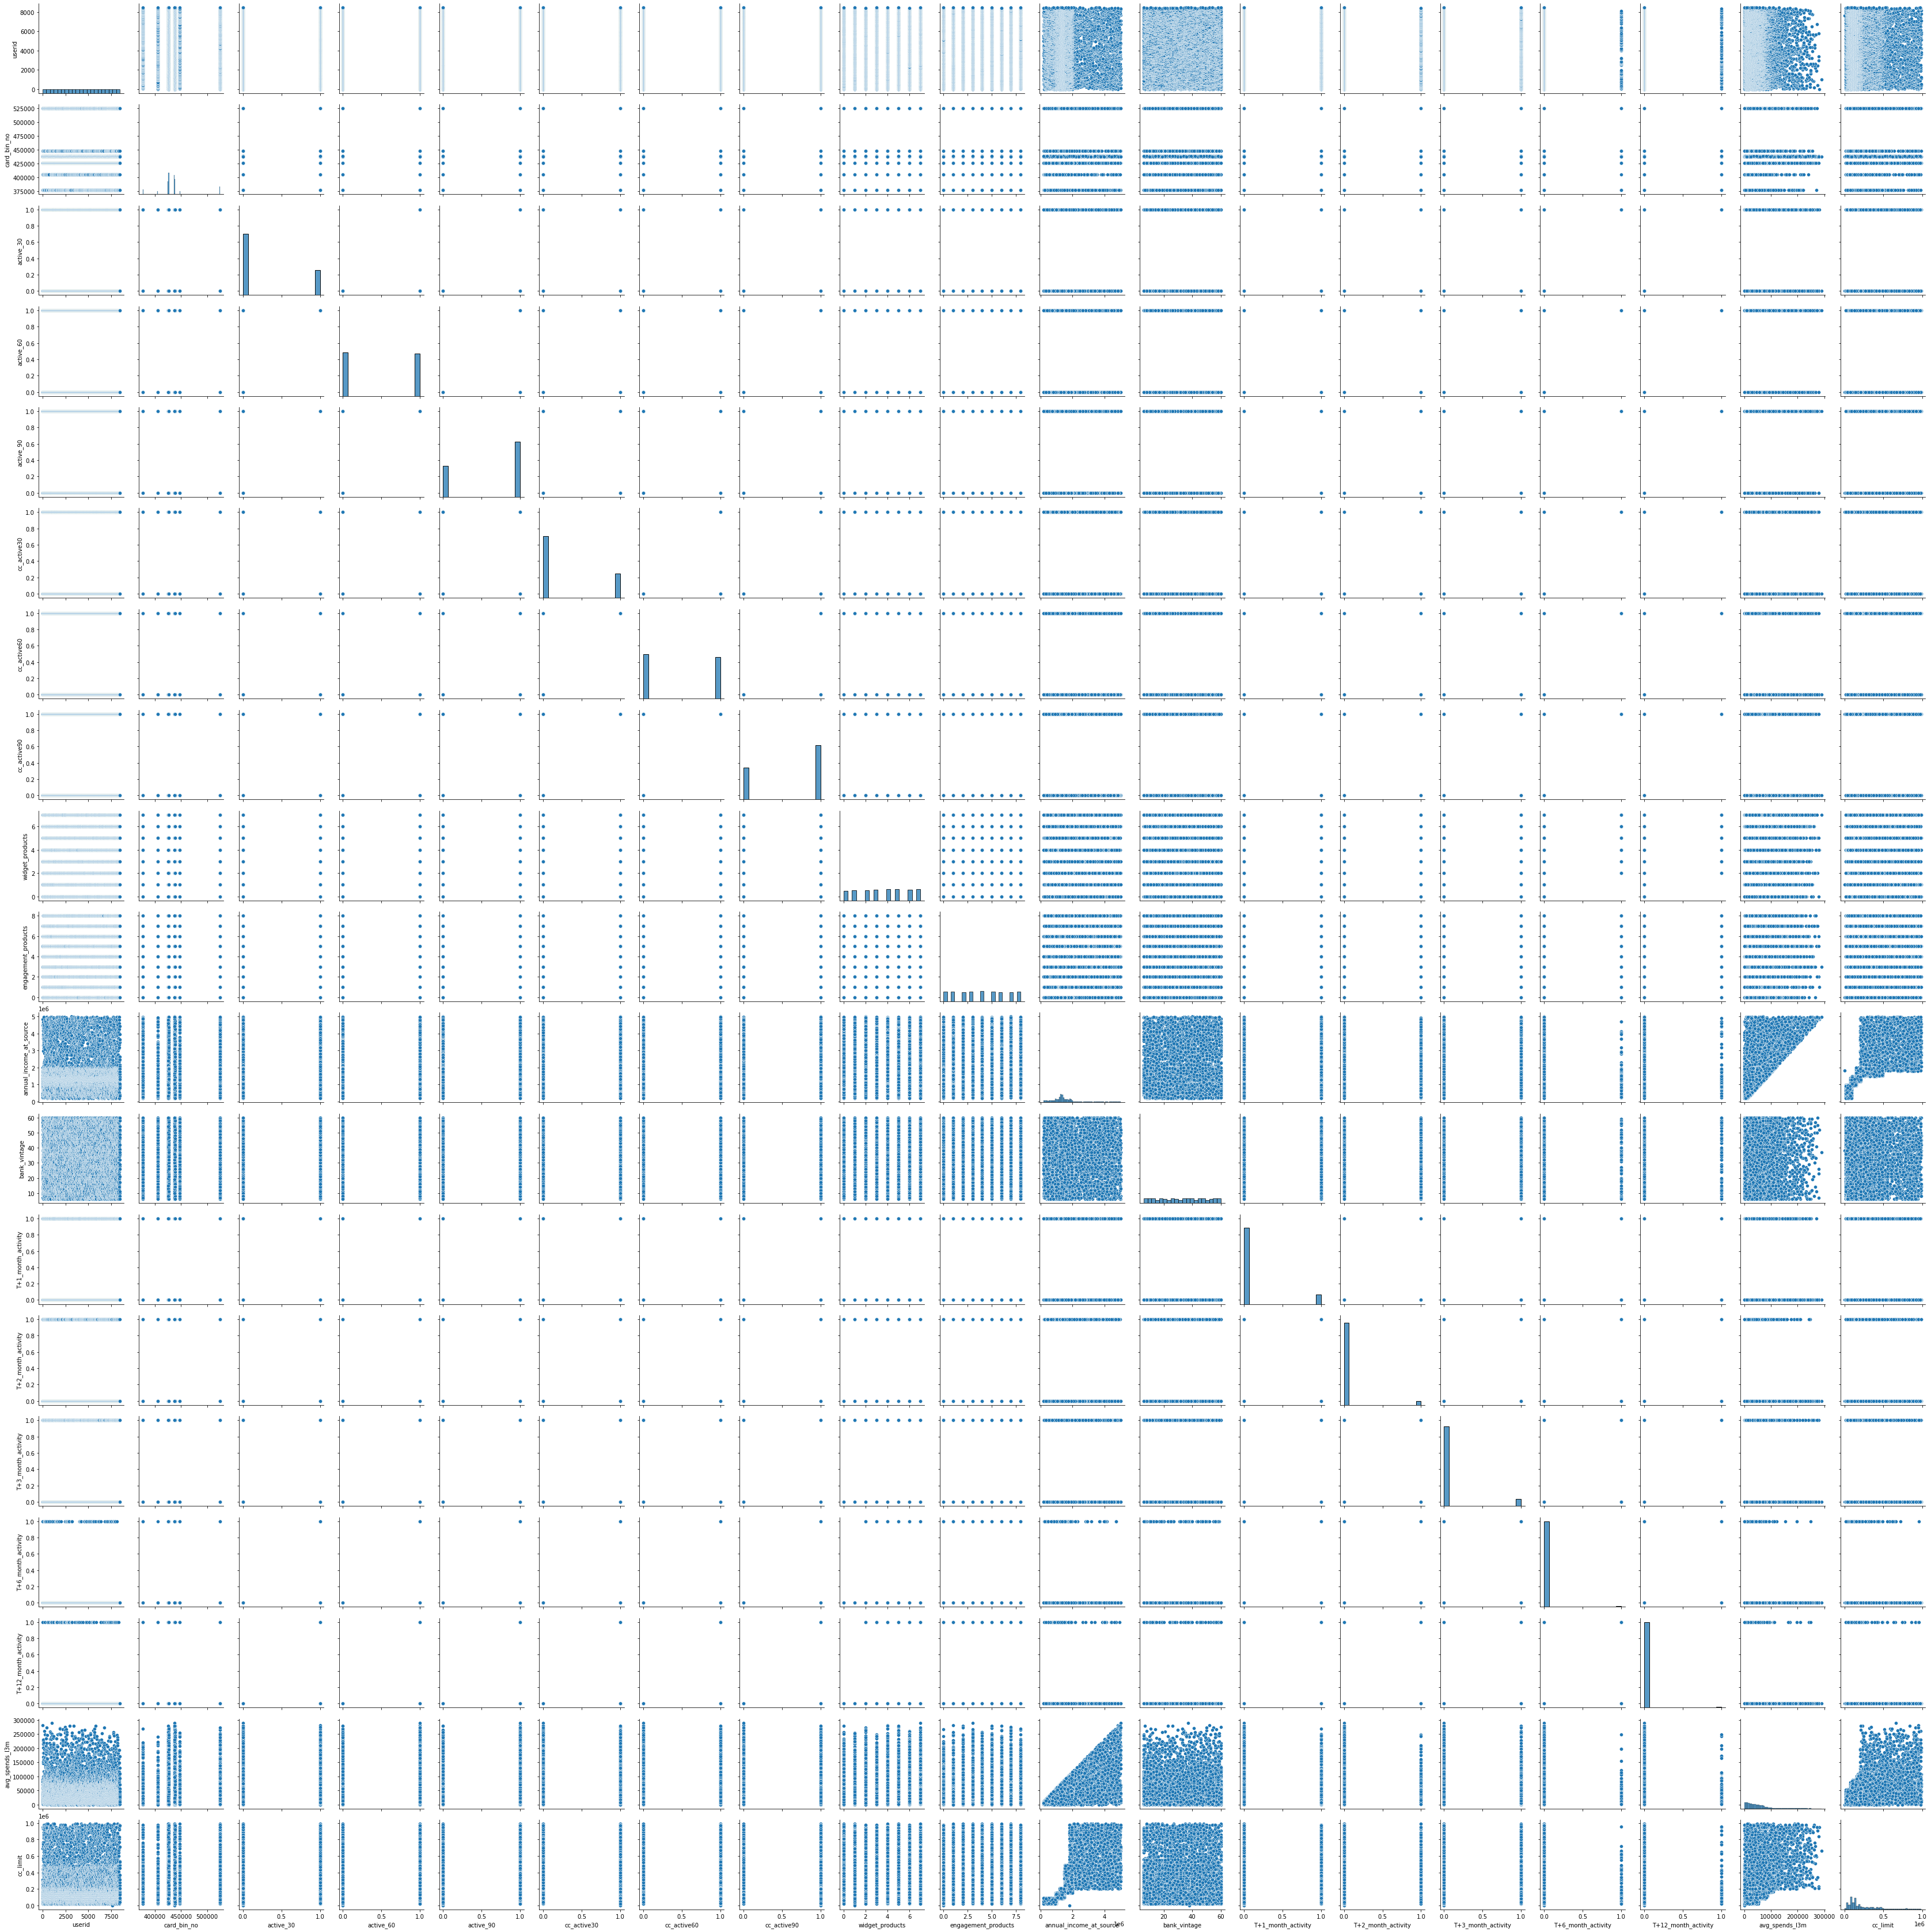

In [57]:
sns.pairplot(godigt_df)

#### #Our objective is to find the list down the top 5 important variables which could help us to get more valuable insights.

#### The top 5 important variables which could help us to get more valuable insights are : cc_limit, Occupation_at_source, avg_spends_l3m, other_bank_cc_holding, annual_income_at_source

#### #cc_limit: For customers who are holding credit card could be interested bying more if he/she gets more limit on purchase. We also keep in mind that we need to upgrade the limit to such limit where the customer could repay their spendings.

THE END